## Acerca del conjunto de datos

El analisis de personalidad de clientes es un analisis detallado de los clientes ideales de una empresa. Ayuda a la empresa a conocer mejor a sus clientes y les permite modificar los productos de acuerdo con las necesidades, comportmaientos e inquietudes de los diferentes tipos de clientes.

Ayuda a la empresa a modificar su producto en funcion de su cliente objetivo de distintos tipos de segmentos de clientes. Ejemplo, en lugar de gastar dinero para comercializar un nuevo producto a todos los clientes, una empresa puede analizar que segmento de clientes tienen mas probabilidades de comprar el producto y luego comercializarlo solo en ese segmento en particular

### Cargar librerias

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt

from scipy.stats import boxcox, zscore
from scipy.special import inv_boxcox

from sklearn.experimental import enable_iterative_imputer
#from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans

### Cargar Datos

In [117]:
df = pd.read_csv('./marketing_campaign.csv', sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [118]:
df.shape

(2240, 29)

> El dataset contiene 2240 observaciones y 29 caracteristicas

### Entendiendo los datos

In [119]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

__Atributos de las personas__

- ID: Identificador unico del cliente.
- Year_Birth: Fecha de nacimento del cliente.
- Education: Nivel educativo.
- Marital_Status: Estado civil.
- Income: Ingresos familiares anuales del cliente.
- Kidhome: Numero de niños en el hogar del cliente.
- Teenhome: Numero de adolescentes en el hogar del cliente.
- Dt_Customer: Fecha de alta del cliente en la empresa.
- Recency: Numero de dias desde la ultima compra del cliente.
- Complain: 1 si el cliente se quejo en los ultimos dos años, 0 en caso contrario.

__Atributos del producto__

- MntWines: Cantidad gastada en vino en los ultimos dos años.
- MntFruits: Cantidad gastada en frutas en los utlimos dos años.
- MntMeatProduts: Cantidad gastada en carnes en los utlimos dos años.
- MntFishProduct: Cantidad gastada en pescado en los utlimos dos años.
- MntSweetProduct: Cantidad gastada en dulces en los ultimos dos años.
- MntGoldProds: Cantidad gastada en oro en los ultimos dos años. 

__Atributos de la promocion__

- NumDealsPurchases: Numero de compras realizadas con descuento.
- AcceptedCmp1: 1 si el cliente acepto la oferta en la primera campaña, 0 en caso contrario.
- AcceptedCmp2: 1 si el cliente acepto la oferta en la segunda campaña, 0 en caso contrario.
- AcceptedCmp3: 1 si el cliente acepto la oferta en la tercera campaña, 0 en caso contrario.
- AcceptedCmp2: 1 si el cliente acepto la oferta en la cuarta campaña, 0 en caso contrario.
- AcceptedCmp2: 1 si el cliente acepto la oferta en la quinta campaña, 0 en caso contrario.
- Response: 1 si el cliente acepto la oferta en la ultima campaña, 0 en caso contrario.

__Atributos del lugar__

- NumWebPurchases: Numero de compras realizadas a traves del sitio web de la empresa.
- NumCatalogPurchases: Numero de compras realizadas por el catalogo de la empresa.
- NumStorePurchases: Numero de compras realizadas directamente en la tienda.
- NumWebVisitsMonth: Numero de visitas al sitio web de la empresa en el ultimo mes.

__Objetivo__

Realizar una agrupacion para resumir y comprender los segmentos de clientes y de esta forma identificar grupos distintos dentro de la base de clientes.

### Analisis Estadistico descriptivo

In [120]:
# mostrar las variables junto a su tipo de dato
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

> Lo anterior muestra que la variable _Income_ presenta valores faltantes. Debemos tratarlos.

Realizamos una resumen estadistico de las variables numericas

In [121]:
df.describe(include='number').round(2).T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.16,3246.66,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.81,11.98,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.25,25173.08,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.44,0.54,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.51,0.54,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.11,28.96,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.94,336.60,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.30,39.77,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.95,225.72,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.53,54.63,0.0,3.00,12.0,50.00,259.0


> El promedio de ingresos por cliente es de 52247.25 con una desviacion estandar de $\pm$ 	25173.08. Este resultado puede ser distinto debido a los datos que faltan.

> El ingreso minimo es de 1730 y el maximo es de 666666. El rango donde se encuenta gran parte de los datos viene dado por el promedio y la suma de la desviacion estandar. Dicho rango es de (27074.17, 77420.33). Al comparar los valores minimo y maximo con el rango, vemos que tales valores son atipicos.

> El promedio de niños en el hogar es de 0.44 lo que indica que gran parte de los hogares no tienen niños.

> El promedio de adolescentes en el hogar es de 0.51 lo que indica que gran parte de los hogares tienen al menos 1.

> El mayor ingreso para la empresa viene de las carnes y de los vinos.

Realizamos un resumen estadistico de las variable de tipo object

In [122]:
df.describe(include='object').T

,count,unique,top,freq
Education,2240,5,Graduation,1127
Marital_Status,2240,8,Married,864
Dt_Customer,2240,663,31-08-2012,12


> La mayor parte de los clientes son graduados y casados.

### Limpieza de datos

#### Tratamiento de valores faltantes

In [123]:
# variable con su respectiva cantidad de valores nulos
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

> Hay 24 observaciones con valores faltantes en la variable _Income_. Esto representa el 1% del total de observaciones por lo que eliminamos tales registros.

In [124]:
# eliminar y actualizar el dataframe
df.dropna(inplace=True)
# mostrar nuevamente variables junto a su cantidad de valores faltantes
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

#### Omitir caracteristicas innecesarias

De las 29 caracteristicas, hay 3 que no aportan valor al analisis que estamos realizando y son: _ID_, _Z_Revenue_ y _Z_CostContact_. Elimanos estas caracteristicas y actualizamos el dataframe

In [125]:
df.drop(columns=['ID', 'Z_CostContact', 'Z_Revenue'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2216 non-null   int64  
 1   Education            2216 non-null   object 
 2   Marital_Status       2216 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2216 non-null   int64  
 5   Teenhome             2216 non-null   int64  
 6   Dt_Customer          2216 non-null   object 
 7   Recency              2216 non-null   int64  
 8   MntWines             2216 non-null   int64  
 9   MntFruits            2216 non-null   int64  
 10  MntMeatProducts      2216 non-null   int64  
 11  MntFishProducts      2216 non-null   int64  
 12  MntSweetProducts     2216 non-null   int64  
 13  MntGoldProds         2216 non-null   int64  
 14  NumDealsPurchases    2216 non-null   int64  
 15  NumWebPurchases      2216 non-null   i

#### Eliminar observaciones duplicadas

In [126]:
print(f'Cantidad de observaciones duplicadas: {(df.duplicated().sum())}')

Cantidad de observaciones duplicadas: 182


In [127]:
# observaciones duplicadas
df[df.duplicated()]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
83,1963,Master,Together,38620.0,0,0,11-05-2013,56,112,17,...,5,3,3,0,0,0,0,0,0,0
179,1951,2n Cycle,Married,78497.0,0,0,01-12-2013,44,207,26,...,7,12,2,0,0,0,1,0,0,0
281,1976,Graduation,Together,51369.0,0,1,25-10-2012,84,297,7,...,2,4,8,0,0,0,0,0,0,0
282,1946,Graduation,Together,37760.0,0,0,31-08-2012,20,84,5,...,1,6,7,0,0,0,0,0,0,0
363,1978,PhD,Married,37717.0,1,0,23-11-2012,31,9,0,...,0,2,9,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,1978,Graduation,Together,22775.0,1,0,19-06-2013,40,5,1,...,0,2,8,0,0,0,0,0,0,0
2221,1982,Master,Single,75777.0,0,0,04-07-2013,12,712,26,...,6,11,1,0,1,1,0,0,0,1
2225,1968,Graduation,Together,58554.0,1,1,26-09-2012,55,368,24,...,2,6,7,0,0,0,0,0,0,0
2234,1974,Graduation,Married,34421.0,1,0,01-07-2013,81,3,3,...,0,2,7,0,0,0,0,0,0,0


In [128]:
# eliminar duplicados
df.drop_duplicates(inplace=True)
df.shape

(2034, 26)

#### Calcular edad de los clientes

Vamos a utilizar la fecha de nacimiento y la fecha de alta en la empresa para estimar la edad que tenian cuando comenzaron a ser clientes

In [129]:
# verificamos el formato de Dt_Customer
df[['Dt_Customer']].head()

,Dt_Customer
0,04-09-2012
1,08-03-2014
2,21-08-2013
3,10-02-2014
4,19-01-2014


In [130]:
# damos el formato de fecha adecuado a los datos de Dt_Customer
df['Dt_Customer'] = pd.to_datetime(df.Dt_Customer, format='%d-%m-%Y')

In [131]:
df['Cus_age'] = df['Dt_Customer'].dt.year - df['Year_Birth']
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Cus_age
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,4,7,0,0,0,0,0,0,1,55
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,2,5,0,0,0,0,0,0,0,60
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,10,4,0,0,0,0,0,0,0,48
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,4,6,0,0,0,0,0,0,0,30
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,6,5,0,0,0,0,0,0,0,33


#### Eliminar caracateristicas innecesarias

Eliminamos Dt_Customer y Year_Birth ya que dejan de ser relevantes

In [132]:
df.drop(columns=['Year_Birth', 'Dt_Customer'], inplace=True)
df.shape

(2034, 25)

#### Limpiar valores categoricos

Las variables categoricas son: Education y Marital_Status. Veamos el contenido de cada una.

In [133]:
# mostrar categorias junto a su respectiva cantidad
df['Education'].value_counts()

Graduation    1019
PhD            445
Master         336
2n Cycle       185
Basic           49
Name: Education, dtype: int64

Vamos a renombrar las categorias por unas mas adecuadas para mejorar la diferenciacion entre educacion basica, universitaria y pos-universitaria

In [134]:
# diccionario con las nuevas categorias
new_categories = {'PhD':'Posgrado',
                  'Master':'Posgrado',
                  '2n Cycle':'Universitario',
                  'Graduation':'Universitario',
                  'Basic':'Basico'}

In [135]:
df['Education'].replace(new_categories, inplace=True)
df['Education'].value_counts()

Universitario    1204
Posgrado          781
Basico             49
Name: Education, dtype: int64

Veamos el contenido de Marital_Status

In [136]:
df['Marital_Status'].value_counts()

Married     788
Together    514
Single      439
Divorced    216
Widow        70
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

Clasifiquemos el estado civil en dos: solo o en pareja

In [137]:
new_Marital = {'Married':'Pareja',
               'Together':'Pareja',
               'Single': 'Solo',
               'Divorced':'Solo',
               'Widow':'Solo',
               'Alone':'Solo',
               'Absurd':'Solo',
               'YOLO':'Solo'}

In [138]:
df['Marital_Status'].replace(new_Marital, inplace=True)
df['Marital_Status'].value_counts()

Pareja    1302
Solo       732
Name: Marital_Status, dtype: int64

#### Variable total de gastos por cliente

Vamos a crear una nueva caracteristicas que contenga el total de dinero gastado por cada cliente

In [139]:
df['Expenses'] = df['MntFishProducts'] + df['MntFruits'] + df['MntGoldProds'] + df['MntMeatProducts'] + df['MntSweetProducts'] + df['MntWines']
df['Expenses'].head()

0    1617
1      27
2     776
3      53
4     422
Name: Expenses, dtype: int64

#### Combinar la cantidad de niños y adolescentes en una nueva variable

In [140]:
df['Kids'] = df['Kidhome'] + df['Teenhome']
df['Kids'].head()

0    0
1    2
2    0
3    1
4    1
Name: Kids, dtype: int64

#### Variable con el total de campañas aceptadas por cliente

In [141]:
df['TotalAcceptedCamp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']
df['TotalAcceptedCamp'].head()

0    0
1    0
2    0
3    0
4    0
Name: TotalAcceptedCamp, dtype: int64

#### Variable con el total de compra por los diferentes medios

In [142]:
df['TotalPurchases'] = df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases'] + df['NumWebPurchases']
df['TotalPurchases'].head()

0    25
1     6
2    21
3     8
4    19
Name: TotalPurchases, dtype: int64

#### Seleccion de caracteristicas relevantes

Vamos a seleccionar las columnas que consideramos mas relevantes para el analisis

In [143]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Cus_age', 'Expenses', 'Kids',
       'TotalAcceptedCamp', 'TotalPurchases'],
      dtype='object')

In [144]:
select_columns = ['Education', 'Marital_Status', 'Income', 'Kids', 'Recency', 'Expenses', 'Cus_age', 'TotalPurchases','TotalAcceptedCamp', 'Complain', 'Response']

df_data = df[select_columns]
df_data.head()

,Education,Marital_Status,Income,Kids,Recency,Expenses,Cus_age,TotalPurchases,TotalAcceptedCamp,Complain,Response
0,Universitario,Solo,58138.0,0,58,1617,55,25,0,0,1
1,Universitario,Solo,46344.0,2,38,27,60,6,0,0,0
2,Universitario,Pareja,71613.0,0,26,776,48,21,0,0,0
3,Universitario,Pareja,26646.0,1,26,53,30,8,0,0,0
4,Posgrado,Pareja,58293.0,1,94,422,33,19,0,0,0


In [145]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2034 entries, 0 to 2239
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          2034 non-null   object 
 1   Marital_Status     2034 non-null   object 
 2   Income             2034 non-null   float64
 3   Kids               2034 non-null   int64  
 4   Recency            2034 non-null   int64  
 5   Expenses           2034 non-null   int64  
 6   Cus_age            2034 non-null   int64  
 7   TotalPurchases     2034 non-null   int64  
 8   TotalAcceptedCamp  2034 non-null   int64  
 9   Complain           2034 non-null   int64  
 10  Response           2034 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 190.7+ KB


#### Clasificar variables de acuerdo al tipo de datos

In [146]:
# variables de tipo binario
var_binary = [col for col in df_data.columns if df_data[col].nunique() == 2]
var_binary

['Marital_Status', 'Complain', 'Response']

In [147]:
# variables de tipo categorico
var_category = [col for col in df_data.columns if 2 < df_data[col].nunique() < 10]
var_category

['Education', 'Kids', 'TotalAcceptedCamp']

In [148]:
# variables de tipo numerica
var_numeric = [col for col in df_data.select_dtypes(include=['number']).columns if col not in var_binary + var_category]
var_numeric

['Income', 'Recency', 'Expenses', 'Cus_age', 'TotalPurchases']

#### Deteccion de outliers

Vamos a estandarizar los datos de las variables numericas a traves del z-score para luego determinar aquellos datos que son anormales

In [149]:
z_scores = pd.DataFrame(zscore(df_data[var_numeric]), columns=var_numeric)
z_scores.head()

,Income,Recency,Expenses,Cus_age,TotalPurchases
0,0.226491,0.315957,1.672780,0.896872,1.320795
1,-0.235644,-0.374256,-0.962269,1.313212,-1.161380
2,0.754494,-0.788384,0.279022,0.313995,0.798232
3,-1.007488,-0.788384,-0.919180,-1.184830,-0.900098
4,0.232565,1.558341,-0.307650,-0.935026,0.536950


Identificamos los registros donde los z-score exceden el intervalo que se consideran datos normales. En términos de estadística, si el valor de un z-score es mayor que 3 (en valor absoluto), se considera un outlier. Esto se debe a que en una distribución normal estándar, el 99.7% de los datos caen dentro de 3 desviaciones estándar de la media. Cualquier valor más allá de este límite es poco común.

In [150]:
outliers = z_scores[(np.abs(z_scores) > 3).any(axis=1)]
outliers

,Income,Recency,Expenses,Cus_age,TotalPurchases
21,-1.955700,-0.236213,1.860051,-0.851758,3.672328
164,4.109812,1.696384,1.657865,-0.268881,2.888484
192,-0.615884,1.730895,-0.899293,5.726420,-1.161380
239,0.306583,-0.891916,-0.970555,6.392565,-1.422661
339,1.221527,-0.443277,2.063894,5.809688,0.014387
432,0.585847,0.937149,0.786144,0.147459,3.149765
617,4.311766,-0.615830,-0.829688,-0.601954,-1.814583
655,3.979761,1.109703,-0.997071,-0.435418,-1.945224
687,4.249307,-0.960937,1.838506,-1.184830,3.802969
987,0.916951,-0.098170,3.112942,-0.019077,1.451435


Una vez encontradas las observaciones con outliers procedemos a eliminarlas del DataFrame.

In [151]:
df = df_data.drop(outliers.index)
df.shape

(2016, 11)

### Analisis Exploratorio de los Datos

Creamos una copia del dataframe

In [152]:
df_copy = df.copy()
df_copy.head()

,Education,Marital_Status,Income,Kids,Recency,Expenses,Cus_age,TotalPurchases,TotalAcceptedCamp,Complain,Response
0,Universitario,Solo,58138.0,0,58,1617,55,25,0,0,1
1,Universitario,Solo,46344.0,2,38,27,60,6,0,0,0
2,Universitario,Pareja,71613.0,0,26,776,48,21,0,0,0
3,Universitario,Pareja,26646.0,1,26,53,30,8,0,0,0
4,Posgrado,Pareja,58293.0,1,94,422,33,19,0,0,0


Mostramos las variables que son numericas

In [154]:
var_numeric

['Income', 'Recency', 'Expenses', 'Cus_age', 'TotalPurchases']

Creamos un histograma para cada variable numerica

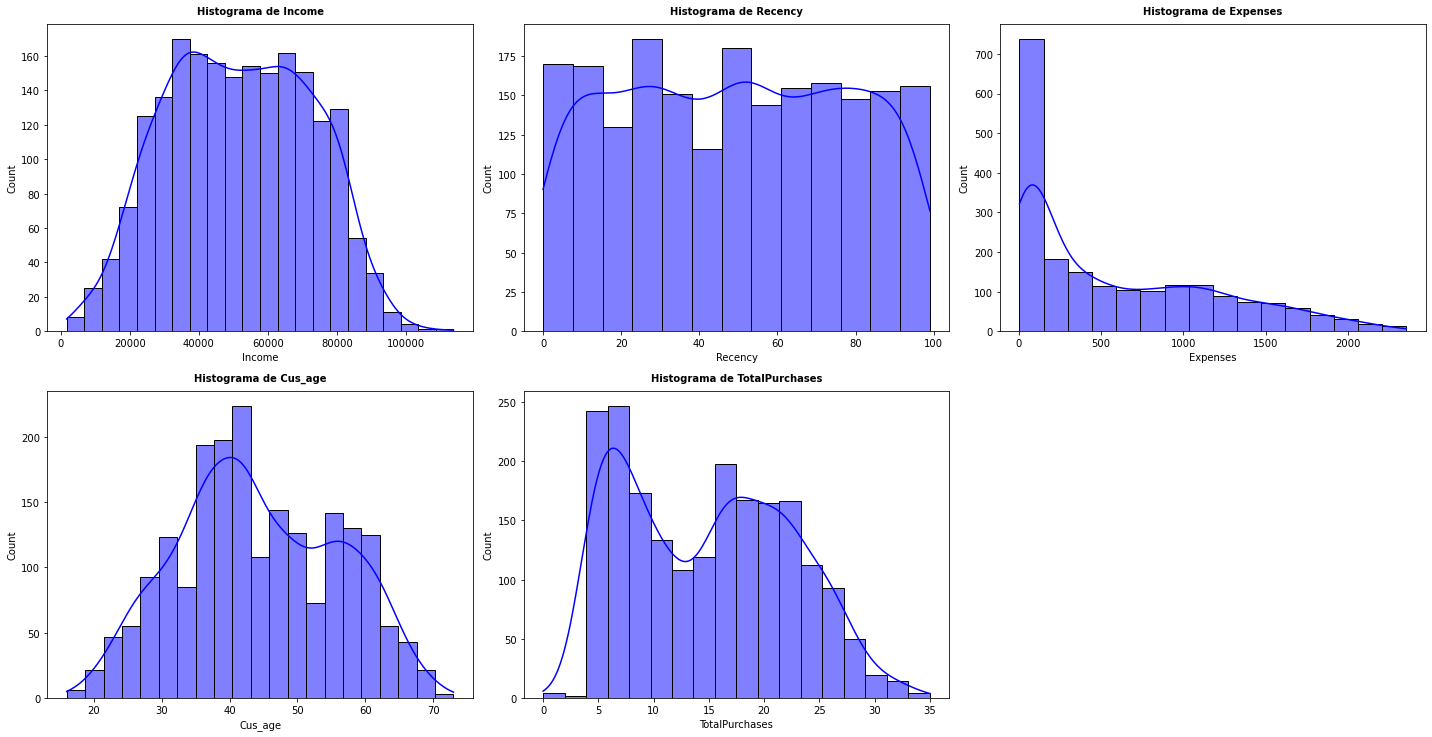

In [155]:
plt.figure(figsize=(20,15))
n_cols = 3
n_row = 3

x = 1
for col in var_numeric:
    plt.subplot(n_row, n_cols, x)
    sns.histplot(data=df_copy, x=col, kde=True, color='blue')
    plt.title(f'Histograma de {col}', pad=10, fontweight='bold', fontsize=10)
    plt.tight_layout()
    x += 1